In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress

%matplotlib inline

# Import the Alphavantage API key
from config import api_key

#import Yahoo finance database. It contains historical stock data
import yfinance as yf


from datetime import datetime


In [2]:
# Define the stock symbols for each sector
solar_symbols = ["TAN", "ENPH", "SEDG", "FSLR", "SKYS", "SOL", "SPWR", "AEIS", "SUNW", "VSLR"]
hydrogen_symbols = ["HYDR", "PLUG", "BLDP", "BE", "HYSR", "NXHSF", "NEWH", "ATCO", "MOTNF", "VENG"]
wind_symbols = ["FAN", "TAC", "TRIC", "AMSC", "VWS", "EXC", "NEE", "XEL", "AGR", "AEE"]

In [3]:
#Process stocks using Pandas library yahoo finance.

# Define a function to download stock data and add sector column
def download_sector_data(tickers, sector_name):
    data = yf.download(tickers, start="2014-01-01", end="2024-09-17", group_by="ticker")
    sector_data = pd.DataFrame()
    for ticker in tickers:
        stock_data = data[ticker]['Adj Close'].rename(ticker)
        sector_data = pd.concat([sector_data, stock_data], axis=1)
    return sector_data


In [4]:

solar_data_df = download_sector_data(solar_symbols, 'Solar')
solar_data_df.head()


[*********************100%***********************]  10 of 10 completed

3 Failed downloads:
['SKYS', 'SUNW', 'VSLR']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


,TAN,ENPH,SEDG,FSLR,SKYS,SOL,SPWR,AEIS,SUNW,VSLR
2014-01-02 00:00:00+00:00,33.838985,6.78,NaN,57.439999,NaN,19.700001,21.147961,22.522840,NaN,NaN
2014-01-03 00:00:00+00:00,34.178627,6.92,NaN,56.740002,NaN,20.350000,21.429497,22.946123,NaN,NaN
2014-01-06 00:00:00+00:00,34.250130,7.04,NaN,51.259998,NaN,21.150000,21.239624,22.650812,NaN,NaN
2014-01-07 00:00:00+00:00,35.349491,7.54,NaN,52.490002,NaN,21.100000,21.429497,23.143005,NaN,NaN
2014-01-08 00:00:00+00:00,35.724888,7.25,NaN,51.680000,NaN,20.850000,21.625917,24.176617,NaN,NaN


In [5]:
wind_data_df = download_sector_data(wind_symbols, 'Wind')
wind_data_df.head()

[*********************100%***********************]  10 of 10 completed

1 Failed download:
['TRIC']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2014-01-01 -> 2024-09-17)')


,FAN,TAC,TRIC,AMSC,VWS,EXC,NEE,XEL,AGR,AEE
2014-01-02 00:00:00+00:00,8.745201,9.666865,NaN,17.400000,537.0,13.216287,15.936961,19.504486,NaN,25.323145
2014-01-03 00:00:00+00:00,8.853834,9.697433,NaN,16.400000,537.0,12.948747,15.957767,19.497398,NaN,25.230488
2014-01-06 00:00:00+00:00,9.078868,9.834986,NaN,16.400000,537.0,13.031446,15.965337,19.391054,NaN,25.487068
2014-01-07 00:00:00+00:00,9.249579,9.682151,NaN,16.799999,537.0,13.099541,16.082611,19.724277,NaN,25.814926
2014-01-08 00:00:00+00:00,9.125425,9.819703,NaN,16.700001,537.0,13.070356,16.133686,19.646286,NaN,25.615362


In [6]:
hydrogen_data_df = download_sector_data(hydrogen_symbols, 'Hydrogen')
hydrogen_data_df.head()

[*********************100%***********************]  10 of 10 completed

1 Failed download:
['ATCO']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


,HYDR,PLUG,BLDP,BE,HYSR,NXHSF,NEWH,ATCO,MOTNF,VENG
2014-01-02 00:00:00+00:00,NaN,2.33,1.75,NaN,0.006,NaN,0.1349,NaN,NaN,NaN
2014-01-03 00:00:00+00:00,NaN,2.61,1.86,NaN,0.006,NaN,0.1249,NaN,NaN,NaN
2014-01-06 00:00:00+00:00,NaN,2.77,1.85,NaN,0.006,NaN,0.1299,NaN,NaN,NaN
2014-01-07 00:00:00+00:00,NaN,3.85,2.47,NaN,0.006,NaN,0.1365,NaN,NaN,NaN
2014-01-08 00:00:00+00:00,NaN,4.55,2.27,NaN,0.007,NaN,0.1114,NaN,NaN,NaN


In [7]:
# Plot Solar stocks
plot_sector_data(solar_data, 'Solar')

NameError: name 'plot_sector_data' is not defined

In [8]:
# Plot Wind stocks
plot_sector_data(wind_data, 'Wind')

NameError: name 'plot_sector_data' is not defined

In [9]:
# Plot Hydrogen stocks
plot_sector_data(hydrogen_data, 'Hydrogen')

NameError: name 'plot_sector_data' is not defined

In [10]:
#Which individual stocks within each sector have outperformed their peers, and what might be contributing to their success?
# Function to download stock data and calculate cumulative returns
def calculate_cumulative_returns(tickers):
    data = yf.download(tickers, start="2014-01-01", end="2024-09-17", group_by="ticker")
    cumulative_returns = pd.DataFrame()
    for ticker in tickers:
        stock_data = data[ticker]['Adj Close'].rename(ticker)
        returns = stock_data / stock_data.iloc[0] - 1  # Calculate cumulative returns
        cumulative_returns = pd.concat([cumulative_returns, returns], axis=1)
    return cumulative_returns

# Download and calculate cumulative returns for each sector
solar_returns = calculate_cumulative_returns(solar_symbols)
hydrogen_returns = calculate_cumulative_returns(hydrogen_symbols)
wind_returns = calculate_cumulative_returns(wind_symbols)

[*********************100%***********************]  10 of 10 completed

3 Failed downloads:
['VSLR', 'SKYS', 'SUNW']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  10 of 10 completed

1 Failed download:
['ATCO']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  10 of 10 completed

1 Failed download:
['TRIC']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2014-01-01 -> 2024-09-17)')


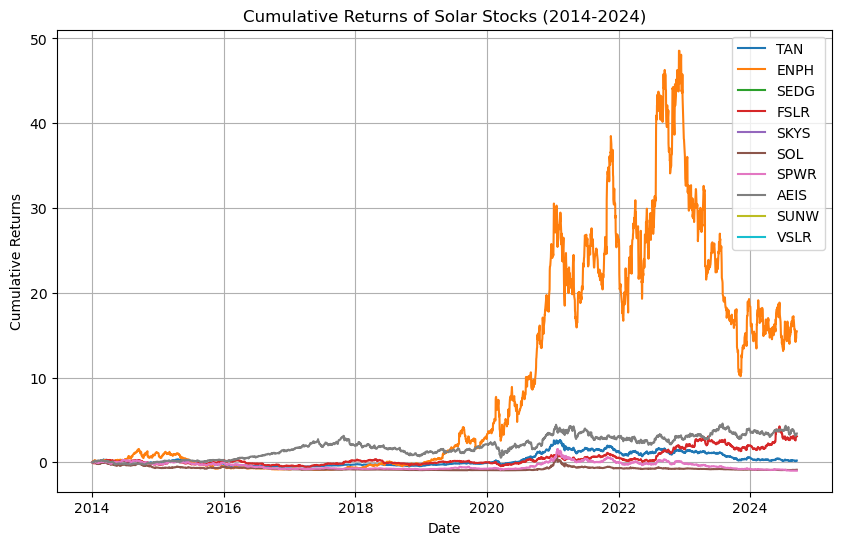

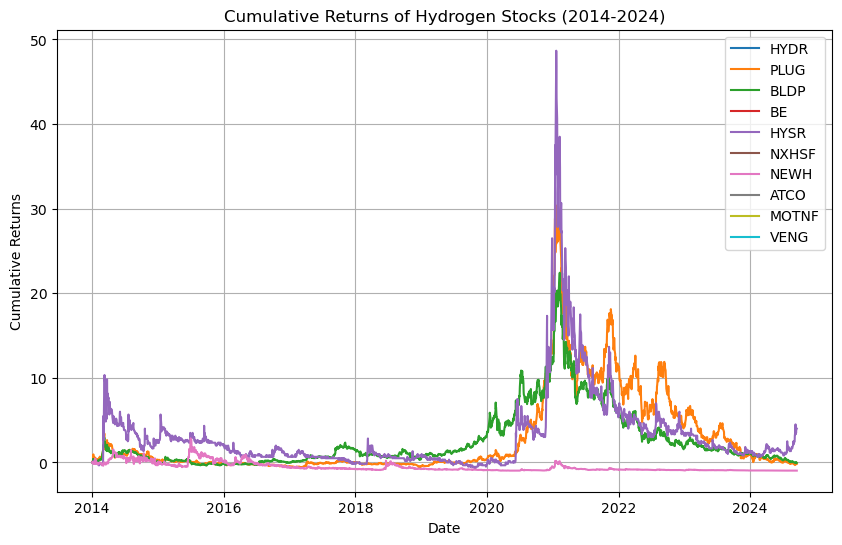

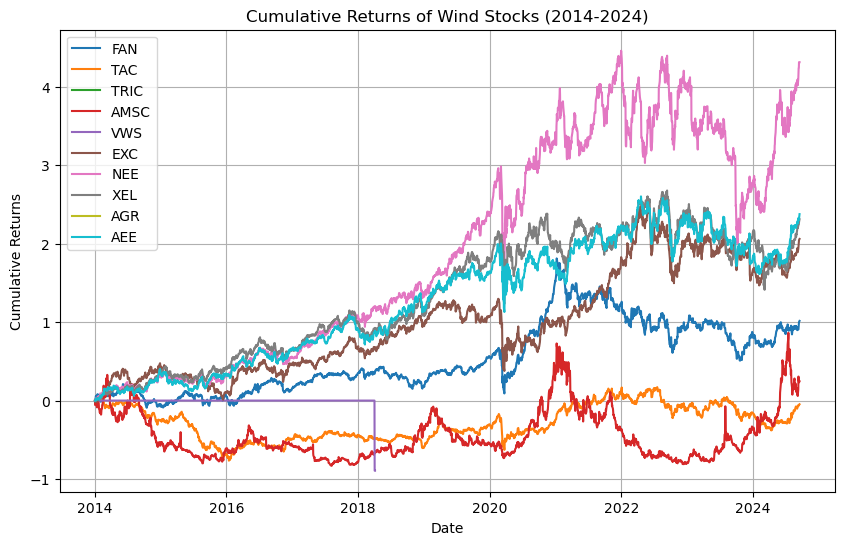

In [11]:
# Plot function for cumulative returns
def plot_cumulative_returns(returns, sector_name):
    plt.figure(figsize=(10,6))
    for column in returns.columns:
        plt.plot(returns.index, returns[column], label=column)
    plt.title(f'Cumulative Returns of {sector_name} Stocks (2014-2024)')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Plot cumulative returns for Solar, Hydrogen, and Wind sectors
plot_cumulative_returns(solar_returns, 'Solar')
plot_cumulative_returns(hydrogen_returns, 'Hydrogen')
plot_cumulative_returns(wind_returns, 'Wind')

In [ ]:
#Process Solar Stocks
oldest_date = "2014-01-31"

time_function = "TIME_SERIES_MONTHLY"
base_url = "https://www.alphavantage.co/query?"

solar_data = []

for symbol in solar_symbols[:2]:
    finished_url = f"{base_url}function={time_function}&symbol={symbol}&apikey={api_key}"
    print(f"Processing {symbol}")

    result_data = requests.get(finished_url).json()

    print(f"{result_data=}")

    time.sleep(12)  # Adjust sleep time as needed (12 seconds to avoid hitting API rate limits)

    for monthly in result_data.get("Monthly Time Series", {}):
        monthly_date = time.strptime(monthly, "%Y-%m-%d")
        oldest = time.strptime(oldest_date, "%Y-%m-%d")
        if monthly_date < oldest:
            continue
        stock_date = monthly
        stock_close = result_data["Monthly Time Series"][monthly]["4. close"]
        solar_data.append({
            "Symbol": symbol,
            "Date": stock_date,
            "Closing Price": stock_close
        })

# Create DataFrame after collecting all data
solar_data_df = pd.DataFrame(solar_data)

solar_data_df.head()


In [ ]:
# Plot Solar Stocks
plt.figure(figsize=(10, 6))

for symbol in solar_symbols:
    # Filter data for each stock symbol
    solar_stock_data = solar_data_df[solar_data_df['Symbol'] == symbol]
    
    # Plot stock data
    plt.plot(solar_stock_data['Date'], solar_stock_data['Closing Price'], label=symbol)

plt.title('Stock Prices for Solar Companies')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
#Process Wind Stocks
oldest_date = "2014-01-31"

time_function = "TIME_SERIES_MONTHLY"
base_url = "https://www.alphavantage.co/query?"

wind_data = []

for symbol in wind_symbols:
    finished_url = f"{base_url}function={time_function}&symbol={symbol}&apikey={api_key}"
    print(f"Processing {symbol}")

    result_data = requests.get(finished_url).json()

    time.sleep(12)  # Adjust sleep time as needed (12 seconds to avoid hitting API rate limits)

    for monthly in result_data.get("Monthly Time Series", {}):
        monthly_date = time.strptime(monthly, "%Y-%m-%d")
        oldest = time.strptime(oldest_date, "%Y-%m-%d")
        if monthly_date < oldest:
            continue
        stock_date = monthly
        stock_close = result_data["Monthly Time Series"][monthly]["4. close"]
        wind_data.append({
            "Symbol": symbol,
            "Date": stock_date,
            "Closing Price": stock_close
        })

# Create DataFrame after collecting all data
wind_data_df = pd.DataFrame(wind_data)
wind_data_df.head()

In [ ]:
# Plot Wind Stocks
plt.figure(figsize=(10, 6))

for symbol in wind_symbols:
    # Filter data for each stock symbol
    wind_stock_data = wind_data_df[wind_data_df['Symbol'] == symbol]
    
    # Plot stock data
    plt.plot(wind_stock_data['Date'], wind_stock_data['Closing Price'], label=symbol)

plt.title('Stock Prices for Wind Companies')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
#Process Hydrogen Stocks
oldest_date = "2014-01-31"

time_function = "TIME_SERIES_MONTHLY"
base_url = "https://www.alphavantage.co/query?"

hydrogen_data = []

for symbol in hydrogen_symbols:
    finished_url = f"{base_url}function={time_function}&symbol={symbol}&apikey={api_key}"
    print(f"Processing {symbol}")

    result_data = requests.get(finished_url).json()

    time.sleep(12)  # Adjust sleep time as needed (12 seconds to avoid hitting API rate limits)

    for monthly in result_data.get("Monthly Time Series", {}):
        monthly_date = time.strptime(monthly, "%Y-%m-%d")
        oldest = time.strptime(oldest_date, "%Y-%m-%d")
        if monthly_date < oldest:
            continue
        stock_date = monthly
        stock_close = result_data["Monthly Time Series"][monthly]["4. close"]
        hydrogen_data.append({
            "Symbol": symbol,
            "Date": stock_date,
            "Closing Price": stock_close
        })

# Create DataFrame after collecting all data
hydrogen_data_df = pd.DataFrame(wind_data)
hydrogen_data_df.head()

In [ ]:
# Plot Wind Stocks
plt.figure(figsize=(10, 6))

for symbol in hydrogen_symbols:
    # Filter data for each stock symbol
    hydrogen_stock_data = hydrogen_data_df[hydrogen_data_df['Symbol'] == symbol]
    
    # Plot stock data
    plt.plot(hydrogen_stock_data['Date'], hydrogen_stock_data['Closing Price'], label=symbol)

plt.title('Stock Prices for Hydrogen Companies')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
#Find outperforming stocks in each category and find what might be contributing to their success
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate percentage change from the first available price
def calculate_percentage_change(df, symbols):
    percentage_change_data = pd.DataFrame()
    
    for symbol in symbols:
        stock_data = df[df['Symbol'] == symbol].sort_values(by='Date')
        
        # Calculate percentage change relative to the first available price
        stock_data['Percentage Change'] = (stock_data['Closing Price'] / stock_data['Closing Price'].iloc[0]) * 100
        
        # Store the percentage change and date for plotting
        percentage_change_data = pd.concat([percentage_change_data, stock_data[['Date', 'Percentage Change', 'Symbol']]])
    
    return percentage_change_data

# List of hydrogen, solar, and wind symbols (replace with actual data)
hydrogen_symbols = ["HYD1", "HYD2", "HYD3"]
solar_symbols = ["TAN", "ENPH", "SEDG", "FSLR", "SKYS", "SOL", "SPWR", "AEIS", "SUNW", "VSLR"]
wind_symbols = ["WND1", "WND2", "WND3"]

# Assuming hydrogen_data_df, solar_data_df, and wind_data_df DataFrames contain stock data for each category

# Calculate percentage changes
hydrogen_percentage_data = calculate_percentage_change(hydrogen_data_df, hydrogen_symbols)
solar_percentage_data = calculate_percentage_change(solar_data_df, solar_symbols)
wind_percentage_data = calculate_percentage_change(wind_data_df, wind_symbols)

# Plotting function for percentage changes
def plot_percentage_change(percentage_change_data, title):
    plt.figure(figsize=(10, 6))
    
    # Loop through each stock and plot the percentage change
    for symbol in percentage_change_data['Symbol'].unique():
        stock_data = percentage_change_data[percentage_change_data['Symbol'] == symbol]
        plt.plot(stock_data['Date'], stock_data['Percentage Change'], label=symbol)
    
    # Customize plot
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Percentage Change (%)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot the percentage changes for each category
plot_percentage_change(hydrogen_percentage_data, 'Percentage Change for Hydrogen Companies')
plot_percentage_change(solar_percentage_data, 'Percentage Change for Solar Companies')
plot_percentage_change(wind_percentage_data, 'Percentage Change for Wind Companies')



In [ ]:
#Process all stocks
oldest_date = "2014-01-31"
company_symbols = [
    "TAN","ENPH","SEDG","FSLR","SKYS", "SOL", "SPWR", "AEIS", "SUNW", "VSLR",
    "HYDR","PLUG","BLDP","BE", "HYSR", "NXHSF", "NEWH", "ATCO", "MOTNF", "VENG"
    "FAN","TAC","TPIC","AMSC","VWS", "EXC", "NEE", "XEL", "AGR", "AEE"
]
time_function = "TIME_SERIES_MONTHLY"
base_url = "https://www.alphavantage.co/query?"
api_key = 'your_alpha_vantage_api_key'
company_data = []

for symbol in company_symbols:
    finished_url = f"{base_url}function={time_function}&symbol={symbol}&apikey={api_key}"
    print(f"Processing {symbol}")

    result_data = requests.get(finished_url).json()

    time.sleep(12)  # Adjust sleep time as needed (12 seconds to avoid hitting API rate limits)

    for monthly in result_data.get("Monthly Time Series", {}):
        monthly_date = time.strptime(monthly, "%Y-%m-%d")
        oldest = time.strptime(oldest_date, "%Y-%m-%d")
        if monthly_date < oldest:
            continue
        stock_date = monthly
        stock_close = result_data["Monthly Time Series"][monthly]["4. close"]
        company_data.append({
            "Symbol": symbol,
            "Date": stock_date,
            "Closing Price": stock_close
        })

# Create DataFrame after collecting all data
company_data_df = pd.DataFrame(company_data)
print("All stocks:  ")
company_data_df.head()


In [ ]:


oldest_date = "2014-01-31"
company_symbols = [
    "TAN",
    "ENPH",
    "SEDG",
    "FSLR",
    "HYDR",
    "PLUG",
    "BLDP",
    "BE",
    "FAN",
    "TAC",
    "TPIC",
    "AMSC"
]
time_function = "TIME_SERIES_MONTHLY"
base_url = "https://www.alphavantage.co/query?"
api_key = 'your_alpha_vantage_api_key'
company_data = []

for symbol in company_symbols:
    finished_url = f"{base_url}function={time_function}&symbol={symbol}&apikey={api_key}"
    print(f"Processing {symbol}")

    result_data = requests.get(finished_url).json()

    time.sleep(12)  # Adjust sleep time as needed (12 seconds to avoid hitting API rate limits)

    for monthly in result_data.get("Monthly Time Series", {}):
        monthly_date = time.strptime(monthly, "%Y-%m-%d")
        oldest = time.strptime(oldest_date, "%Y-%m-%d")
        if monthly_date < oldest:
            continue
        stock_date = monthly
        stock_close = result_data["Monthly Time Series"][monthly]["4. close"]
        company_data.append({
            "Symbol": symbol,
            "Date": stock_date,
            "Closing Price": stock_close
        })

# Create DataFrame after collecting all data
company_data_df = pd.DataFrame(company_data)
company_data_df.head()
